In [ ]:
#This program predicts the price of Google stock for a spesific day

In [128]:
#Import libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [136]:
#Load data
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [137]:
#Store and look data
df = pd.read_csv('Google_Stock_Price_Test.csv')
df

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,620.76,"11,688,800"
...,...,...,...,...,...,...,...
294,3/7/2013,415.47,416.75,413.24,830.32,830.32,"4,120,700"
295,3/8/2013,415.69,415.90,410.98,829.24,829.24,"5,845,600"
296,3/11/2013,414.29,418.28,414.20,832.53,832.53,"3,201,200"
297,3/12/2013,413.80,414.39,410.30,825.34,825.34,"4,031,600"


In [138]:
#Get and print last row of data
actual_price = df.tail(1)
actual_price

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
298,3/13/2013,412.4,413.79,409.62,823.05,823.05,"3,294,800"


In [139]:
#Prepare data for training
df = df.head(len(df)-1)
df

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,620.76,"11,688,800"
...,...,...,...,...,...,...,...
293,3/6/2013,418.94,420.42,412.86,829.10,829.10,"5,767,400"
294,3/7/2013,415.47,416.75,413.24,830.32,830.32,"4,120,700"
295,3/8/2013,415.69,415.90,410.98,829.24,829.24,"5,845,600"
296,3/11/2013,414.29,418.28,414.20,832.53,832.53,"3,201,200"


In [140]:
#Create empty list to store the independent and dependent data
days = list()
adj_close_prices = list()

In [141]:
#Get the date and the adjusted close price
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close Price']

In [142]:
#Create the independent data set
for day in df_days:
  days.append( [int(day.split('/')[1])] )

In [143]:
#Cretae the dependent data set
for adj_close_price in df_adj_close:
  adj_close_prices.append( float(adj_close_price) )


In [144]:
#Create the 3 Support Vector Regression Models

#Create and train a SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

#Create and train a SVR model using a polynominal kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

#Create and train a SVR model using a rbf kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma = 0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

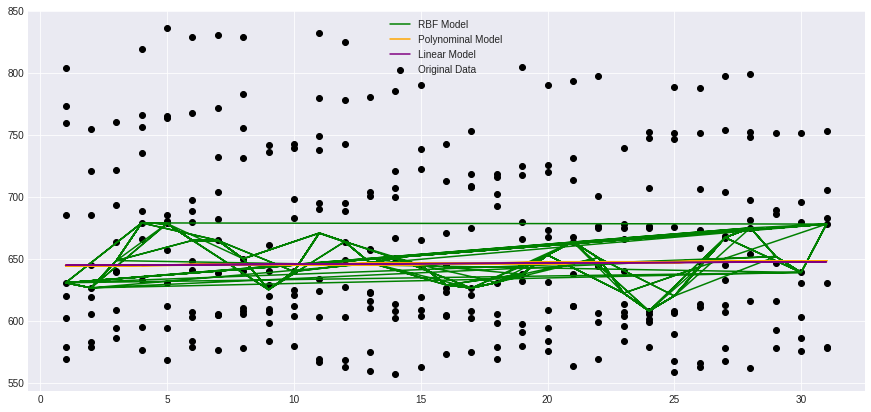

In [145]:
#Plot the models on a graph to see whitc has the best fir to the original data
plt.figure(figsize=(15,7))
plt.scatter(days, adj_close_prices, color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynominal Model')
plt.plot(days, lin_svr.predict(days), color='purple', label='Linear Model')
plt.legend()
plt.show()

In [146]:
#Show the predicted price for the given day
day = [[30]]

print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The RBF Polynominal predicted:', poly_svr.predict(day))

The RBF SVR predicted: [639.38053538]
The Linear SVR predicted: [647.81666667]
The RBF Polynominal predicted: [648.53720067]
